In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
cnm = {'three': 3,'four': 4,'five': 5,'six': 6,'eight': 8,'twelve': 12, 'two': 2}
df['cylindernumber_numeric'] = df['cylindernumber'].replace(cnm)

In [10]:
dnm = {'three': 3,'four': 4,'five': 5,'six': 6,'eight': 8,'twelve': 12, 'two': 2}
df['doornumber_numeric'] = df['doornumber'].replace(dnm)

In [12]:
df['fueltypef'] = df['fueltype'].map(df['fueltype'].value_counts())
df['aspirationf'] = df['aspiration'].map(df['aspiration'].value_counts())
df['carbodyf'] = df['carbody'].map(df['carbody'].value_counts())
df['drivewheelf'] = df['drivewheel'].map(df['drivewheel'].value_counts())
df['enginelocation'] = df['enginelocation'].map(df['enginelocation'].value_counts())
df['carnamef'] = df['CarName'].map(df['CarName'].value_counts())
df['fuelsystemf'] = df['fuelsystem'].map(df['fuelsystem'].value_counts())
df['enginetypef'] = df['enginetype'].map(df['enginetype'].value_counts())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   CarName                 205 non-null    object 
 3   fueltype                205 non-null    object 
 4   aspiration              205 non-null    object 
 5   doornumber              205 non-null    object 
 6   carbody                 205 non-null    object 
 7   drivewheel              205 non-null    object 
 8   enginelocation          205 non-null    int64  
 9   wheelbase               205 non-null    float64
 10  carlength               205 non-null    float64
 11  carwidth                205 non-null    float64
 12  carheight               205 non-null    float64
 13  curbweight              205 non-null    int64  
 14  enginetype              205 non-null    ob

In [16]:
df.drop(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'fuelsystem', 'enginetype', 'doornumber', 'cylindernumber'], axis=1, inplace=True)

In [18]:
Q1 = df['enginesize'].quantile(0.25)
Q3 = df['enginesize'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
df['enginesize'] = np.where(df['enginesize'] < lb, lb, df['enginesize'])
df['enginesize'] = np.where(df['enginesize'] > ub, ub, df['enginesize'])

In [20]:
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR
df['horsepower'] = np.where(df['horsepower'] < l, l, df['horsepower'])
df['horsepower'] = np.where(df['horsepower'] > u, u, df['horsepower'])

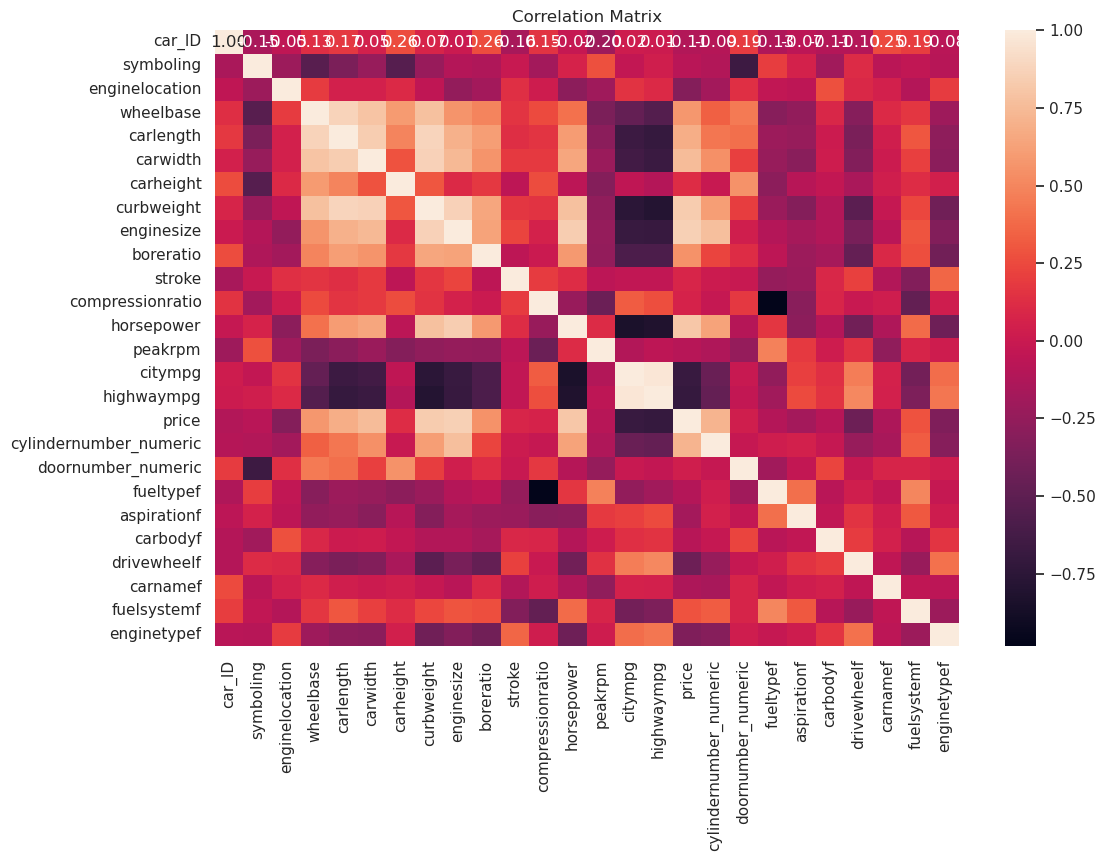

In [22]:
correlation_matrix = df.corr()
sns.set(rc={'figure.figsize': (12, 8)})
sns.set_theme(style="whitegrid")
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [24]:
correlation_matrix = df.corr()
target_correlations = correlation_matrix['price'].drop('price')
threshold = 0.5
selected_features = target_correlations[abs(target_correlations) > threshold]
print(selected_features)

wheelbase                 0.577816
carlength                 0.682920
carwidth                  0.759325
curbweight                0.835305
enginesize                0.854532
boreratio                 0.553173
horsepower                0.809985
citympg                  -0.685751
highwaympg               -0.697599
cylindernumber_numeric    0.718305
Name: price, dtype: float64


In [26]:
selected_features = ['horsepower', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'citympg', 'highwaympg', 'cylindernumber_numeric']
new_df = df[selected_features].copy()
new_df['price'] = df['price']
print(new_df.head())

   horsepower  wheelbase  carlength  carwidth  curbweight  enginesize  \
0       111.0       88.6      168.8      64.1        2548       130.0   
1       111.0       88.6      168.8      64.1        2548       130.0   
2       154.0       94.5      171.2      65.5        2823       152.0   
3       102.0       99.8      176.6      66.2        2337       109.0   
4       115.0       99.4      176.6      66.4        2824       136.0   

   boreratio  citympg  highwaympg  cylindernumber_numeric    price  
0       3.47       21          27                       4  13495.0  
1       3.47       21          27                       4  16500.0  
2       2.68       19          26                       6  16500.0  
3       3.19       24          30                       4  13950.0  
4       3.19       18          22                       5  17450.0  


In [28]:
def min_max_scale(df):
    for column in df.columns:
        min_val = df[column].min()
        max_val = df[column].max()
        df[column] = (df[column] - min_val) / (max_val - min_val)
min_max_scale(new_df)
print("Min-Max Scaled DataFrame:\n", new_df.head())

Min-Max Scaled DataFrame:
    horsepower  wheelbase  carlength  carwidth  curbweight  enginesize  \
0    0.459854   0.058309   0.413433  0.316667    0.411171    0.472603   
1    0.459854   0.058309   0.413433  0.316667    0.411171    0.472603   
2    0.773723   0.230321   0.449254  0.433333    0.517843    0.623288   
3    0.394161   0.384840   0.529851  0.491667    0.329325    0.328767   
4    0.489051   0.373178   0.529851  0.508333    0.518231    0.513699   

   boreratio   citympg  highwaympg  cylindernumber_numeric     price  
0   0.664286  0.222222    0.289474                     0.2  0.207959  
1   0.664286  0.222222    0.289474                     0.2  0.282558  
2   0.100000  0.166667    0.263158                     0.4  0.282558  
3   0.464286  0.305556    0.368421                     0.2  0.219254  
4   0.464286  0.138889    0.157895                     0.3  0.306142  


In [30]:
shuffled_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)
split_index = int(0.8 * len(shuffled_df))
X = shuffled_df.drop('price', axis=1)
y = shuffled_df['price']
X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]
X_test = X.iloc[split_index:]
y_test = y.iloc[split_index:]
train_set = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test_set = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)
print("Training Set:\n", train_set.head())
print("\nTesting Set:\n", test_set.head())


Training Set:
    horsepower  wheelbase  carlength  carwidth  curbweight  enginesize  \
0    0.978102   0.492711   0.714925  0.550000    0.675718    1.000000   
1    0.817518   0.376093   0.553731  0.633333    0.607060    0.479452   
2    0.357664   0.309038   0.482090  0.408333    0.315749    0.404110   
3    0.452555   0.364431   0.679104  0.516667    0.453840    0.410959   
4    0.547445   0.682216   0.743284  0.833333    0.877424    0.835616   

   boreratio   citympg  highwaympg  cylindernumber_numeric     price  
0   0.771429  0.083333    0.157895                     0.4  0.636562  
1   0.421429  0.083333    0.157895                     0.3  0.316299  
2   0.564286  0.388889    0.473684                     0.2  0.110000  
3   0.714286  0.222222    0.315789                     0.2  0.167122  
4   0.742857  0.250000    0.236842                     0.3  0.574202  

Testing Set:
      horsepower  wheelbase  carlength  carwidth  curbweight  enginesize  \
164    0.788321   0.521866   0

In [289]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_reg=0.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_reg = lambda_reg
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n + 1) 

        # Add bias term (x0 = 1)
        X_b = np.c_[np.ones((m, 1)), X]  

        for epoch in range(self.epochs):
            predictions = self.predict(X) 
            errors = predictions - y  

            for j in range(n + 1):
                gradient = np.dot(errors, X_b[:, j]) / m  
                if j == 0: 
                    self.theta[j] -= self.learning_rate * gradient
                else:
                    self.theta[j] -= self.learning_rate * (gradient + (self.lambda_reg * self.theta[j]) / m)

            if epoch % 100 == 0:
                mse = self.mean_squared_error(y, predictions)
                r2 = self.r_squared(y, predictions)
                print(f'Epoch {epoch}, MSE: {mse:.4f}, R^2: {r2:.4f}')

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X] 
        return np.dot(X_b, self.theta)

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r_squared(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)

    def mean_absolute_error(self, y_true, y_pred):
        mae = np.mean(np.abs(y_true - y_pred))
        return mae

    def root_mean_squared_error(self, y_true, y_pred):
        rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
        return rmse

# Function to create polynomial features
def polynomial_features(X, degree):
    poly_features = X.copy()
    for d in range(2, degree + 1):
        poly_features = np.column_stack((poly_features, X ** d))
    return poly_features
    
degree = 2  
X_poly = polynomial_features(X, degree)


X_train_poly = X_poly[:split_index]
y_train = y.iloc[:split_index].values
X_test_poly = X_poly[split_index:]
y_test = y.iloc[split_index:].values


model = LinearRegression(learning_rate=0.5, epochs=3600, lambda_reg=0.01)
model.fit(X_train_poly, y_train)
predictions = model.predict(X_test_poly)
mse_test = model.mean_squared_error(y_test, predictions)
r2_test = model.r_squared(y_test, predictions)
mae_test = model.mean_absolute_error(y_test, predictions)
rmse_test = model.root_mean_squared_error(y_test, predictions)

print("Mean Squared Error on testing set:", mse_test)
print("R^2 on testing set:", r2_test)
print("Mean Absolute Error on testing set:", mae_test)
print("Root Mean Squared Error on testing set:", rmse_test)
print("Predictions:", predictions)

Epoch 0, MSE: 0.0747, R^2: -1.0368
Epoch 100, MSE: 0.0052, R^2: 0.8589
Epoch 200, MSE: 0.0050, R^2: 0.8625
Epoch 300, MSE: 0.0050, R^2: 0.8648
Epoch 400, MSE: 0.0049, R^2: 0.8667
Epoch 500, MSE: 0.0048, R^2: 0.8684
Epoch 600, MSE: 0.0048, R^2: 0.8698
Epoch 700, MSE: 0.0047, R^2: 0.8711
Epoch 800, MSE: 0.0047, R^2: 0.8723
Epoch 900, MSE: 0.0046, R^2: 0.8733
Epoch 1000, MSE: 0.0046, R^2: 0.8743
Epoch 1100, MSE: 0.0046, R^2: 0.8751
Epoch 1200, MSE: 0.0046, R^2: 0.8759
Epoch 1300, MSE: 0.0045, R^2: 0.8766
Epoch 1400, MSE: 0.0045, R^2: 0.8773
Epoch 1500, MSE: 0.0045, R^2: 0.8779
Epoch 1600, MSE: 0.0045, R^2: 0.8785
Epoch 1700, MSE: 0.0044, R^2: 0.8790
Epoch 1800, MSE: 0.0044, R^2: 0.8795
Epoch 1900, MSE: 0.0044, R^2: 0.8800
Epoch 2000, MSE: 0.0044, R^2: 0.8805
Epoch 2100, MSE: 0.0044, R^2: 0.8809
Epoch 2200, MSE: 0.0044, R^2: 0.8813
Epoch 2300, MSE: 0.0043, R^2: 0.8817
Epoch 2400, MSE: 0.0043, R^2: 0.8820
Epoch 2500, MSE: 0.0043, R^2: 0.8824
Epoch 2600, MSE: 0.0043, R^2: 0.8827
Epoch 2700, 